In [37]:
import numpy as np
import pandas as pd 
import os
import glob
import time
from PIL import Image
from skimage.io import imread, imshow
image_list_train=[]
labels_train =[]


In [38]:
#Iterate over training folder, import images as numpy arrays and create labels for them.
dir = os.getcwd()
for i in range(10):
        for filename in glob.glob(dir + '/train/'+ str(i) + '/*.png'):
            im=Image.open(filename)
            data = np.asarray(im)
            image_list_train.append(data)
            labels_train.append(i)
                 

In [40]:
#Fetch data from test folder and put it in X_test and Y_test
dir = os.getcwd()
X_test = []
Y_test = []
for i in range(10):
        for filename in glob.glob(dir + '/test/'+ str(i) + '/*.png'):
            im=Image.open(filename)
            data = np.asarray(im)
            X_test.append(data)
            Y_test.append(i)
print(len(Y_test))

10000


In [4]:
print(len(image_list_train))

48000


In [12]:
# calculate average pixel value for each digit, store it in mean_pixel_values (mean value for each digit is at corresponding value in list)
mean_pixel_values = [0] * 10
for i,k in enumerate(image_list_train):
    sum_of_pixels = 0
    for j,z in enumerate(k):
        sum_of_pixels+= sum(z)

    mean_pixel_values[labels_train[i]] = (mean_pixel_values[labels_train[i]] + sum_of_pixels/28*28)/2
print(mean_pixel_values)

[31642.826593400587, 15787.718907512104, 28008.009267893154, 26919.17814437559, 23799.464270633438, 26294.070196452532, 26821.549765595708, 22477.533497301258, 28114.40952059533, 18951.124848872965]


In [46]:
X_train = image_list_train
Y_train = labels_train
print(len(X_train))
print(len(Y_train))

48000
48000


(28, 28)
48000


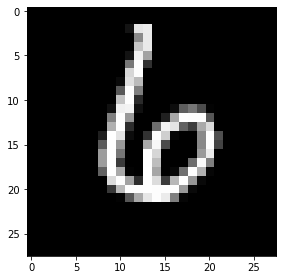

In [14]:
# Just check that data looks fine
from skimage.io import imread, imshow
print(image_list_train[0].shape)
imshow(image_list_train[33000])
print(len(image_list_train))

In [39]:
#Fetch data from test folder and put it in X_test and Y_test
dir = os.getcwd()
X_test = []
Y_test = []
for i in range(10):
        for filename in glob.glob(dir + '/test/'+ str(i) + '/*.png'):
            im=Image.open(filename)
            data = np.asarray(im)
            X_test.append(data)
            Y_test.append(i)
print(len(Y_test))

10000


In [62]:
#Count accuracy with custom predictor
import time

def dist(x,y):
    return np.sqrt(np.sum((x-y)**2))

def custom_predictor_each_pixel_a_feature(X_train,X_test, Y_train):
    l = len(X_train)
    distance = np.zeros(l) 
    for i in range(l):
        distance[i] = dist(X_train[i],X_test)
    min_index = np.argmin(distance)
    print("Predicted value is: " + str(Y_train[min_index]))

def accuracy_when_each_pixel_a_feature(X_train, X_test, Y_train, Y_test):
    l = len(X_train)
    number_of_errors = 0
    distance = np.zeros(l)

    for j,k in enumerate(X_test):
        for i in range(l):
            distance[i] = dist(X_train[i],X_test)
            min_index = np.argmin(distance)
        if Y_train[min_index] != Y_test[j]:
            number_of_errors+=1
    print("Accuracy: " + str(number_of_errors/len(X_test)))
    
def main():
    start_time = time.time()
    accuracy_when_each_pixel_a_feature(X_train, X_test, Y_train, Y_test)
    print("--- %s seconds ---" % (time.time() - start_time))
if __name__ == "__main__":
    main()    

Accuracy: 0.89


In [31]:
# calculate average pixel value for each digit(sum every pixel out of 28*28 pixels), store it in mean_pixel_values (mean value for each digit is at corresponding value in list)
def calculate_average_pixel_count_for_each_digit(X_train):
    mean_pixel_values = [0] * 10
    for i,k in enumerate(X_train):
        sum_of_pixels=0
        for row in k:
            sum_of_pixels= sum_of_pixels + sum(row)
        mean_pixel_values[Y_train[i]] = (mean_pixel_values[Y_train[i]] + sum_of_pixels/(28*28))/2
    return mean_pixel_values

#Input is number and list.  Searches closest number in the list, and returns the index
def closest(l, number):
    l = np.asarray(l)
    idx = (np.abs(l - number)).argmin()
    return idx

def accuracy_when_pixel_mean_value_is_a_feature(X_avg_test, X_test, Y_test):
    l = len(X_train)
    number_of_errors = 0
    distance = np.zeros(l)

    for j,k in enumerate(X_test):
        sum_of_pixels =0
        for i,z in enumerate(k):
            sum_of_pixels += sum(z)
        
        if Y_train[closest(X_avg_test, sum_of_pixels)] != Y_test[j]:
            number_of_errors+=1
    print("Accuracy: " + str(number_of_errors/len(X_test)))
    
def main():
    avg_pixels_for_each_digit = calculate_average_pixel_count_for_each_digit(X_train)
    #print(avg_pixels_for_each_digit)
    start_time = time.time()
    accuracy_when_pixel_mean_value_is_a_feature(avg_pixels_for_each_digit, X_test, Y_test)
    print("--- %s seconds ---" % (time.time() - start_time))

if __name__ == "__main__":
    main()    

Accuracy: 0.902
--- 1.469087839126587 seconds ---


In [97]:
print(len(X_train))

48000


In [47]:
from sklearn import svm
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
# Calculate using KNN from sklearn library, K =10
X_train_KNN = []
X_test_KNN = []

for i,k in enumerate(X_train):
    whole_array=[]
    for z in k:
        whole_array.extend(z)
    X_train_KNN.append(whole_array)
    
for i,k in enumerate(X_test):
    whole_array=[]
    for z in k:
        whole_array.extend(z)
    X_test_KNN.append(whole_array)

    
knn_model = KNeighborsRegressor(n_neighbors=10)

knn_model.fit(X_train_KNN, Y_train)
start_time = time.time()
accuracy = knn_model.score(X_test_KNN, Y_test)
print("Score: " + str(accuracy))
print("--- %s seconds ---" % (time.time() - start_time))

Score: 0.9385183157378719
--- 15.649776458740234 seconds ---


In [56]:
#Calculate accuracy using average pixel value
def calculate_average_pixel_count_for_each_digit(X_train):
    mean_pixel_values = [0] * 10
    for i,k in enumerate(X_train):
        sum_of_pixels=0
        for row in k:
            sum_of_pixels= sum_of_pixels + row
        mean_pixel_values[Y_train[i]] = (mean_pixel_values[Y_train[i]] + sum_of_pixels/(28*28))/2
    return mean_pixel_values

knn_model = KNeighborsRegressor(n_neighbors=10)
X_train_avg = calculate_average_pixel_count_for_each_digit(X_train_KNN)
X_test_avg = calculate_average_pixel_count_for_each_digit(X_test_KNN)
print(X_train_avg)
print(X_test_avg)
start_time = time.time()
knn_model.fit(X_train_avg, Y_train)
accuracy = knn_model.score(X_test_avg, Y_test)
print("Score: " + str(accuracy))
print("--- %s seconds ---" % (time.time() - start_time))

[40.36074820586809, 20.137396565704215, 35.724501617210656, 34.33568640864233, 30.35645952886918, 33.53835484241394, 34.21116041530065, 28.67032333839446, 35.86021622524915, 24.172353123562456]
[29.50194514402177, 33.6466773349383, 0, 0, 0, 0, 0, 0, 0, 0]


ValueError: Expected 2D array, got 1D array instead:
array=[40.36074821 20.13739657 35.72450162 34.33568641 30.35645953 33.53835484
 34.21116042 28.67032334 35.86021623 24.17235312].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [48]:
#Import Grayscale Pixel Values as Features and store in in list features_grayscale_pixel_values
features_grayscale_pixel_values = []
for i,k in enumerate(image_list_train):
    features_grayscale_pixel_values.append(np.reshape(k, 28*28))


In [49]:
# store new features - horizontal and vertical edges calculated using prewitt kernel
features_edge_horizontal = []
features_edge_vertical = []

In [50]:
#calculating horizontal and vertical edges using prewitt kernel
from skimage.filters import prewitt_h,prewitt_v
import matplotlib.pyplot as plt
%matplotlib inline

def calculate_prewitt(data):
    features_edge_horizontal = []
    features_edge_vertical = []
    for image in data:
        edges_prewitt_horizontal = prewitt_h(image)
        edges_prewitt_vertical = prewitt_v(image)
        features_edge_horizontal.append(edges_prewitt_horizontal)
        features_edge_vertical.append(edges_prewitt_vertical)
    return features_edge_horizontal, features_edge_vertical


In [51]:
features_edge_horizontal, features_edge_vertical = calculate_prewitt(image_list_train)

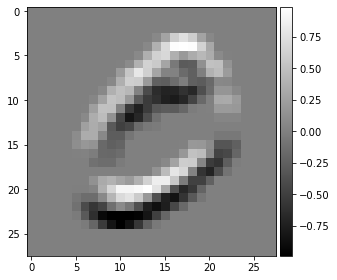

In [52]:
imshow(features_edge_horizontal[0], cmap='gray')

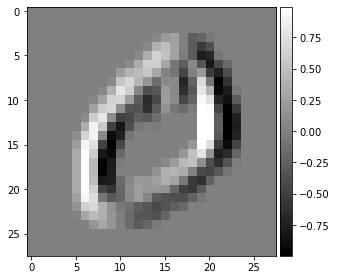

In [53]:
imshow(features_edge_vertical[0], cmap='gray')

In [54]:
#Calculate Histogram of Oriented Gradients as a new feature
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

features_hog = []
hog_images = []
for image in image_list_train:
#generating HOG features
    fd, hog_image = hog(image, orientations=9, pixels_per_cell=(4, 4), cells_per_block=(3, 3), visualize=True, multichannel=False)
    hog_images.append(hog_image)


KeyboardInterrupt: 

In [ ]:
dir = os.getcwd()
image_list_val = []
labels_val = []
for i in range(10):
        for filename in glob.glob(dir + '/val/'+ str(i) + '/*.png'):
            im=Image.open(filename)
            data = np.asarray(im)
            image_list_val.append(data)
            labels_val.append(i)
            
features_edge_horizontal_val, features_edge_vertical_val = calculate_prewitt(image_list_val)

In [ ]:

hog_image_rescaled = exposure.rescale_intensity(hog_images[10002], in_range=(0, 10)) 
imshow(hog_image_rescaled, cmap=plt.cm.gray) 

In [ ]:
data_tuples_train = list(zip(features_edge_vertical,features_edge_horizontal, labels_train))
df_train = pd.DataFrame(data_tuples_train, columns=['features_edge_vertical','features_edge_horizontal', 'label'])
    

In [ ]:
data_tuples_val = list(zip(features_edge_vertical_val,features_edge_horizontal_val, labels_val))
df_val = pd.DataFrame(data_tuples_val, columns=['features_edge_vertical','features_edge_horizontal', 'label'])

In [ ]:
mean_values = df_train.groupby("label")['features_edge_vertical'].apply(np.mean)
mean_values["size"] =mean_values.apply(np.linalg.norm)
print(mean_values["size"])

In [ ]:
from sklearn import svm
from sklearn import metrics
training_feature_edge_horizontal = []
for i,k in enumerate(features_edge_horizontal):
    training_feature_edge_horizontal.append(np.reshape(k, 28*28))
clf = svm.SVC(kernel='rbf')
clf.fit(features_grayscale_pixel_values, labels_train)
#y_pred = clf.predict(df_val)

In [ ]:
y_pred = clf.predict(df_val)

In [ ]:
try:
        #for dirname, _, filenames in os.walk(dir):
            #for filename in filenames:
                #print(os.path.join(dirname, filename))
    image_list_train = []
    labels_train = []
    for i in range(10):
            print(i)
            for filename in glob.glob(dir + '/train/'+ str(i) + '/*.png'): #assuming gif
                im=Image.open(filename)
                data = np.asarray(im)
                image_list.append(im)
                labels.append(i)
                
    except Exception as e:
        print(e)

if __name__ == "__main__":
    main()    